                            OLS Regression Results                            
Dep. Variable:               SpotRate   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     12.50
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.58e-09
Time:                        12:16:06   Log-Likelihood:                -887.38
No. Observations:                  72   AIC:                             1789.
Df Residuals:                      65   BIC:                             1805.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.068e+05   2.28e+05      0.906

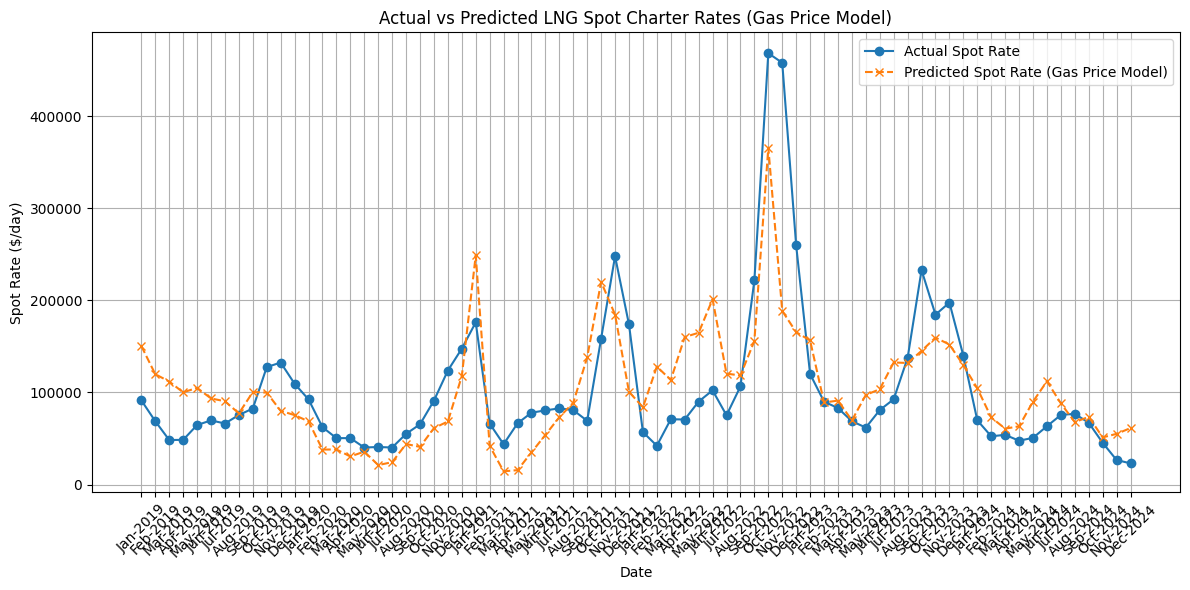

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("cleandata.csv")

df_model = df.copy()
df_model['AsiaGas'] = df['Global price of Natural Gas, Asia (start month, MMBTU)']
df_model['EUGas'] = df['Global price of Natural Gas, EU (start month, MMBTU)']
df_model['USGas'] = df['Global price of Natural Gas, US Henry Hub (start month, MMBTU)']
df_model['SpotRate'] = df['LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)']
df_model['FleetCapacity'] = df['LNG Shipping Capacity (CBM)']
df_model['NewbuildPrice'] = df['LNG Carrier Newbuilding Prices (end month, $m)']
df_model['Orderbook'] = df['LNG Orderbook (start month, CBM)']

df_model.dropna(inplace=True)

X = df_model[['AsiaGas', 'EUGas', 'USGas', 'FleetCapacity', 'NewbuildPrice', 'Orderbook']]
y = df_model['SpotRate']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

df_model['PredictedRate'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:len(df_model)], df_model['SpotRate'], label='Actual Spot Rate', marker='o')
plt.plot(df['Date'][:len(df_model)], df_model['PredictedRate'], label='Predicted Spot Rate (Gas Price Model)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Spot Rate ($/day)")
plt.title("Actual vs Predicted LNG Spot Charter Rates (Gas Price Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Date', 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)',
       'LNG Shipping Capacity (CBM)',
       'LNG Carrier Newbuilding Prices (end month, $m)',
       'LNG Orderbook (start month, CBM)',
       'Global price of Natural Gas, Asia (start month, MMBTU)',
       'Global price of Natural Gas, EU (start month, MMBTU)',
       'Global price of Natural Gas, US Henry Hub (start month, MMBTU)',
       'Spread\nEU-US', 'Spread\nASIA-US', 'Spread\nASIA-EU'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:               SpotRate   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     9.479
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           7.58e-07
Time:                        12:26:20   Log-Likelihood:                -895.52
No. Observations:         

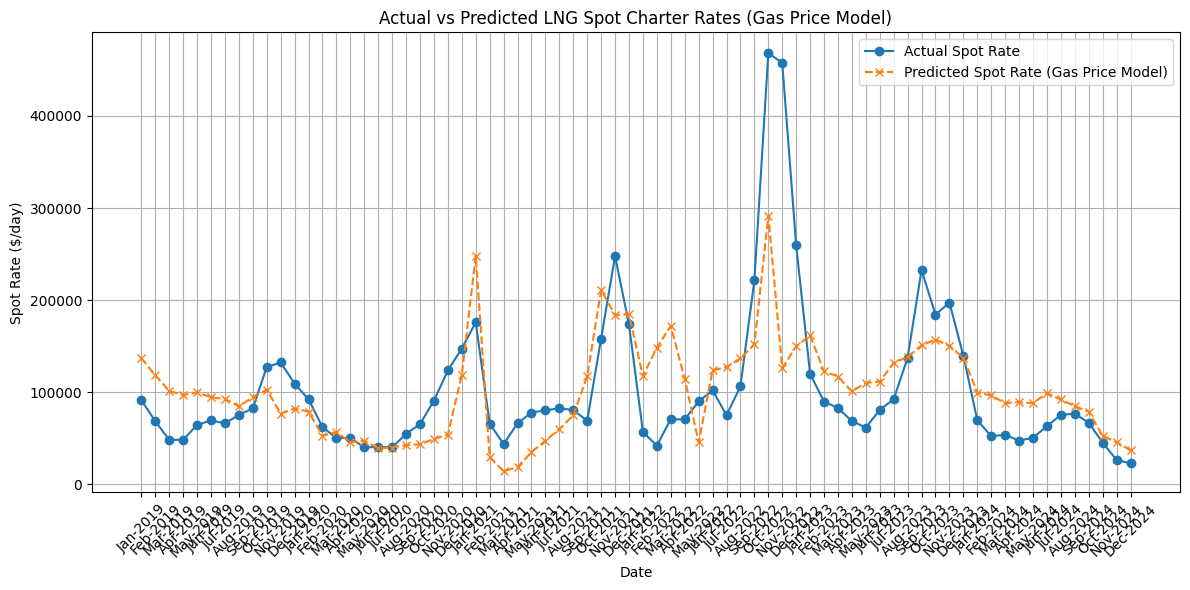

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("cleandata.csv")

print(df.columns)

df_model = df.copy()
df_model['Asia - US Spread'] = df['Spread\nASIA-US']
df_model['EU - US Spread'] = df['Spread\nEU-US']
df_model['Asia - EU Spread'] = df['Spread\nASIA-EU']
df_model['SpotRate'] = df['LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)']
df_model['FleetCapacity'] = df['LNG Shipping Capacity (CBM)']
df_model['NewbuildPrice'] = df['LNG Carrier Newbuilding Prices (end month, $m)']
df_model['Orderbook'] = df['LNG Orderbook (start month, CBM)']

df_model.dropna(inplace=True)

X = df_model[['Asia - US Spread', 'EU - US Spread', 'Asia - EU Spread', 'FleetCapacity', 'NewbuildPrice', 'Orderbook']]
y = df_model['SpotRate']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

df_model['PredictedRate'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:len(df_model)], df_model['SpotRate'], label='Actual Spot Rate', marker='o')
plt.plot(df['Date'][:len(df_model)], df_model['PredictedRate'], label='Predicted Spot Rate (Gas Price Model)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Spot Rate ($/day)")
plt.title("Actual vs Predicted LNG Spot Charter Rates (Gas Price Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['Date', 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)',
       'LNG Shipping Capacity (CBM)',
       'LNG Carrier Newbuilding Prices (end month, $m)',
       'LNG Orderbook (start month, CBM)',
       'Global price of Natural Gas, Asia (start month, MMBTU)',
       'Global price of Natural Gas, EU (start month, MMBTU)',
       'Global price of Natural Gas, US Henry Hub (start month, MMBTU)',
       'Spread\nEU-US', 'Spread\nASIA-US', 'Spread\nASIA-EU'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:               SpotRate   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.750
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           5.50e-05
Time:                        12:23:14   Log-Likelihood:                -903.25
No. Observations:         

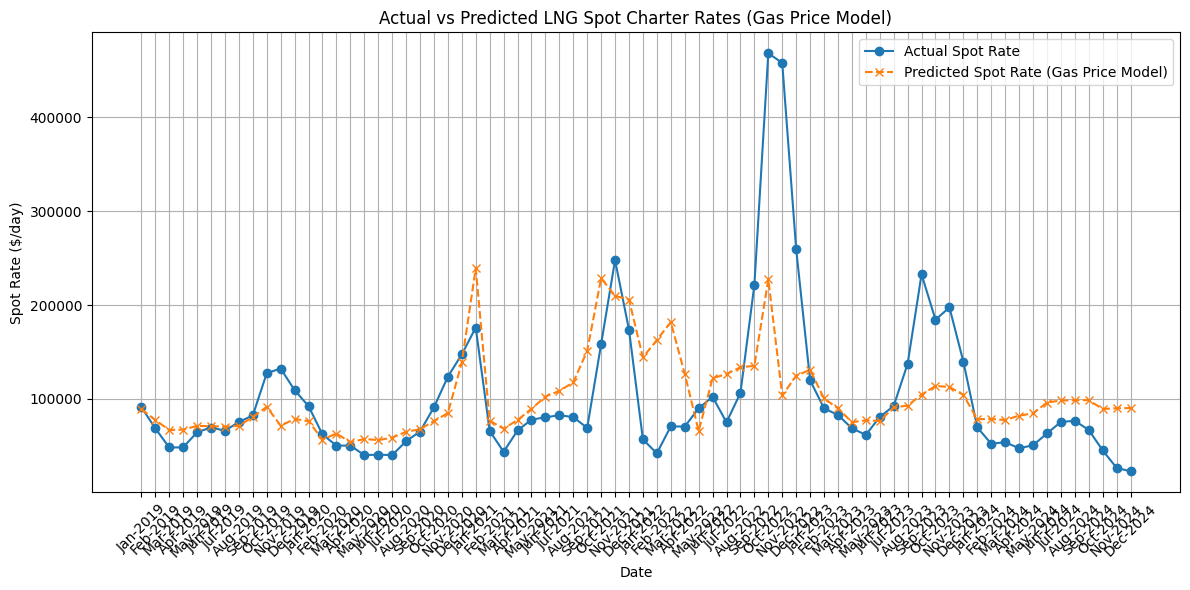

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("cleandata.csv")

print(df.columns)

df_model = df.copy()
df_model['Asia - US Spread'] = df['Spread\nASIA-US']
df_model['EU - US Spread'] = df['Spread\nEU-US']

df_model['SpotRate'] = df['LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)']
df_model['FleetCapacity'] = df['LNG Shipping Capacity (CBM)']


df_model.dropna(inplace=True)

X = df_model[['Asia - US Spread', 'EU - US Spread', 'FleetCapacity']]
y = df_model['SpotRate']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

df_model['PredictedRate'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:len(df_model)], df_model['SpotRate'], label='Actual Spot Rate', marker='o')
plt.plot(df['Date'][:len(df_model)], df_model['PredictedRate'], label='Predicted Spot Rate (Gas Price Model)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Spot Rate ($/day)")
plt.title("Actual vs Predicted LNG Spot Charter Rates (Gas Price Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:               SpotRate   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     10.03
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.02e-06
Time:                        12:24:04   Log-Likelihood:                -898.12
No. Observations:                  72   AIC:                             1806.
Df Residuals:                      67   BIC:                             1818.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.933e+04   7.47e+04     -0.393

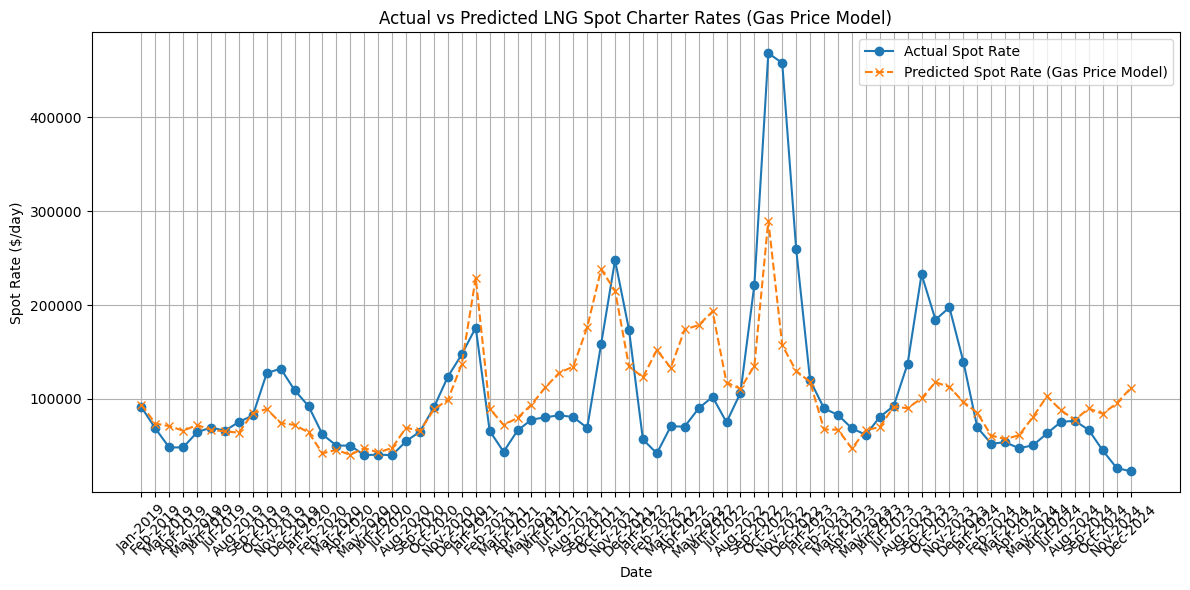

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("cleandata.csv")

df_model = df.copy()
df_model['AsiaGas'] = df['Global price of Natural Gas, Asia (start month, MMBTU)']
df_model['EUGas'] = df['Global price of Natural Gas, EU (start month, MMBTU)']
df_model['USGas'] = df['Global price of Natural Gas, US Henry Hub (start month, MMBTU)']
df_model['SpotRate'] = df['LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)']
df_model['FleetCapacity'] = df['LNG Shipping Capacity (CBM)']
df_model['NewbuildPrice'] = df['LNG Carrier Newbuilding Prices (end month, $m)']
df_model['Orderbook'] = df['LNG Orderbook (start month, CBM)']

df_model.dropna(inplace=True)

# Define X (independent variables) and y (dependent variable)
X = df_model[['AsiaGas', 'EUGas', 'USGas', 'FleetCapacity']]
y = df_model['SpotRate']

# Add constant term to X
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Predict spot rates
df_model['PredictedRate'] = model.predict(X)

# Plot actual vs predicted spot rates
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:len(df_model)], df_model['SpotRate'], label='Actual Spot Rate', marker='o')
plt.plot(df['Date'][:len(df_model)], df_model['PredictedRate'], label='Predicted Spot Rate (Gas Price Model)', linestyle='--', marker='x')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Spot Rate ($/day)")
plt.title("Actual vs Predicted LNG Spot Charter Rates (Gas Price Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
